In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pandas as pd

In [2]:
DATASET_BASE_PATH = 'dataset'

In [3]:
bird_names = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']

In [4]:
def load_feature_names():
    with open(os.path.join(DATASET_BASE_PATH, 'feature_names.txt')) as f:
        return f.read().split('\n')

In [5]:
def load_annotations_for_file(bird: str, file_nr):
    data = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.npy'))
    labels = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.labels.npy'))
    return data, labels

In [6]:
def get_file_nrs_of_bird(bird: str):
    return [f.split('.')[0] for f in os.listdir(os.path.join(DATASET_BASE_PATH, bird))[::2]]

In [7]:
def load_annotations_for_bird_array(bird: str):
    file_nrs = get_file_nrs_of_bird(bird)
    data_arrays = np.zeros(shape=(len(file_nrs),100, 548))
    label_arrays = np.zeros(shape=(len(file_nrs),100,1))
    for i,file_nr in enumerate(file_nrs):
        data, labels = load_annotations_for_file(bird, file_nr)
        data_arrays[i] = data
        label_arrays[i] = labels[:,0][..., np.newaxis]
    data_arrays = data_arrays.reshape(-1, 548)
    label_arrays = label_arrays.reshape(-1,)
    return data_arrays, label_arrays

In [8]:
X = np.zeros(shape=(6,20000,548))
y = np.zeros(shape=(6,20000))
for i, bird_name in enumerate(bird_names):
    data_arr, label_arr = load_annotations_for_bird_array(bird_name)
    X[i] = data_arr
    y[i] = label_arr
X = X.reshape(-1, 548)
y = y.reshape(-1,)
print(X.shape, y.shape)

(120000, 548) (120000,)


In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [10]:
df = pd.DataFrame(data= X_std)
df['label'] = y

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,546,547,label
0,0.324853,2.234985,-0.461250,-0.459697,-0.458253,-0.460968,-0.465535,-0.449217,-0.451182,-0.547805,...,-0.172302,0.080310,2.470300,0.530690,0.550376,1.346904,0.440528,1.204424,-0.304300,0.0
1,0.989178,0.132790,-0.469780,-0.450666,-0.448523,-0.450307,-0.451012,-0.450295,-0.451634,-0.450558,...,0.151305,0.105084,1.061932,1.853208,-1.044705,-0.787284,-0.567376,-0.374989,0.278298,0.0
2,1.194685,0.010198,-0.453683,-0.453699,-0.450746,-0.452051,-0.449489,-0.449706,-0.450521,-0.449023,...,-0.407717,-0.003469,-1.158163,1.589867,-0.405181,-1.129201,0.208342,-0.603692,0.199675,0.0
3,1.469728,-0.275156,-0.452810,-0.452095,1.038133,1.033007,1.038578,1.070068,1.076200,1.079808,...,-0.415646,-0.001220,0.043979,0.587352,1.090300,-0.714864,0.054454,-0.868647,-0.086277,0.0
4,1.447376,0.114848,-0.471611,1.085548,1.090256,1.080141,1.083316,1.097960,1.085294,1.094416,...,-0.574759,0.002824,-0.077341,0.057453,1.533986,0.253063,-0.370477,-0.390308,-0.083962,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,-0.307808,-0.400559,-0.594240,-0.601831,-0.586475,-0.599853,-0.588341,-0.591748,-0.601566,-0.600409,...,-0.836325,-0.697713,0.937012,-1.265575,0.901798,-0.437241,-0.755890,-0.317793,-0.489154,0.0
119996,-0.441294,-0.619189,-0.598058,-0.590810,-0.589035,-0.589904,-0.587234,-0.585571,-0.594526,-0.593013,...,-0.535147,-0.703345,0.337411,-0.006167,-0.675841,0.552243,-0.135932,-1.124722,-0.480388,0.0
119997,-0.323950,-0.562923,-0.598347,-0.598618,-0.596927,-0.587339,-0.597913,-0.597698,-0.598575,-0.582482,...,-0.805287,-0.632309,-0.203184,1.107725,1.066933,0.066132,0.156849,-1.321141,-0.735044,0.0
119998,-0.386658,-0.573564,-0.552378,-0.552066,-0.546696,-0.584835,-0.573869,-0.583535,-0.584801,-0.584532,...,-0.471637,-0.623406,-0.158139,-0.297675,-0.309379,-0.096192,-1.239868,-0.849260,-0.353855,0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0, verbose=1, n_jobs=20)
forest.fit(X_std, y)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(n_jobs=20, random_state=0, verbose=1)

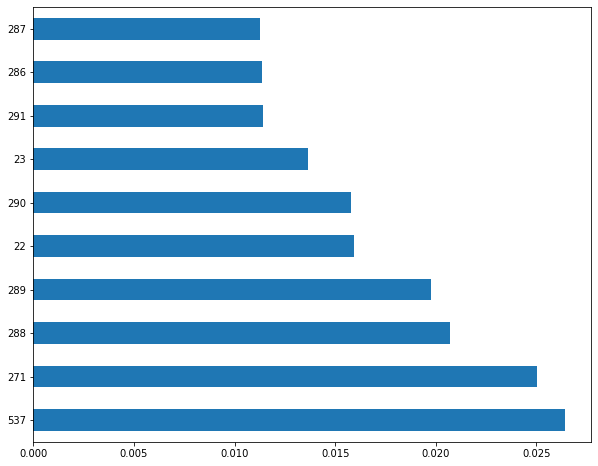

In [13]:
data_X = df.iloc[:,:-1]  #independent columns
data_y = df.iloc[:,-1]    #target column i.e price range
feat_importances = pd.Series(forest.feature_importances_, index=data_X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
plt.show()

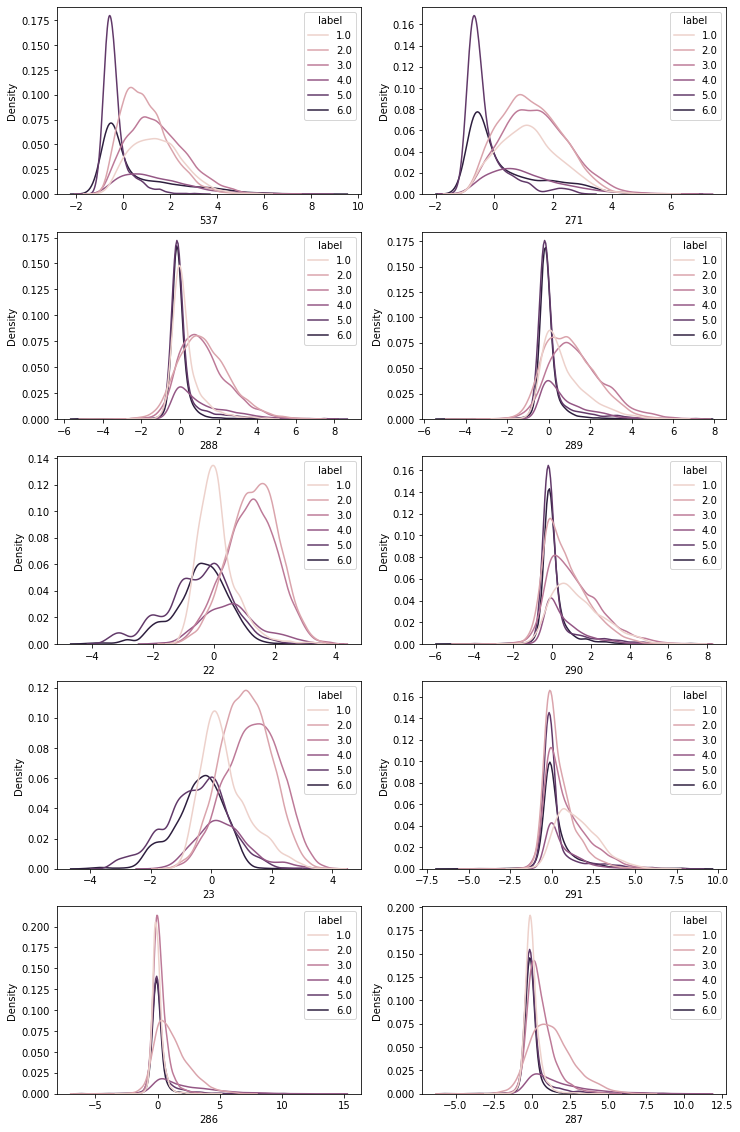

In [45]:
df_most_important_features = df.iloc[:, list(feat_importances.nlargest(10).index) + [-1]]
# display(df_most_important_features)

fig, axs = plt.subplots(5, 2, figsize=(12, 20))

for i in range(10):
    ax = axs[i // 2, i % 2]
    sns.kdeplot(data=df_most_important_features.query('label != 0.0'), x=df_most_important_features.columns[i], hue='label', ax=ax)
    # ax.set_yscale('log')
    

In [12]:
data_X = df.iloc[:,:-1]  #independent columns
data_y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data_X,data_y)

ExtraTreesClassifier()

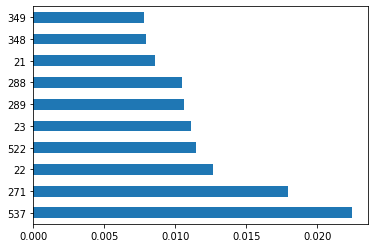

In [13]:
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [14]:
print(feat_importances.nlargest(10).index)

Index([537, 271, 22, 522, 23, 289, 288, 21, 348, 349], dtype='object')


Index([537, 271, 22, 522, 23, 289, 288, 21, 348, 349], dtype='object')


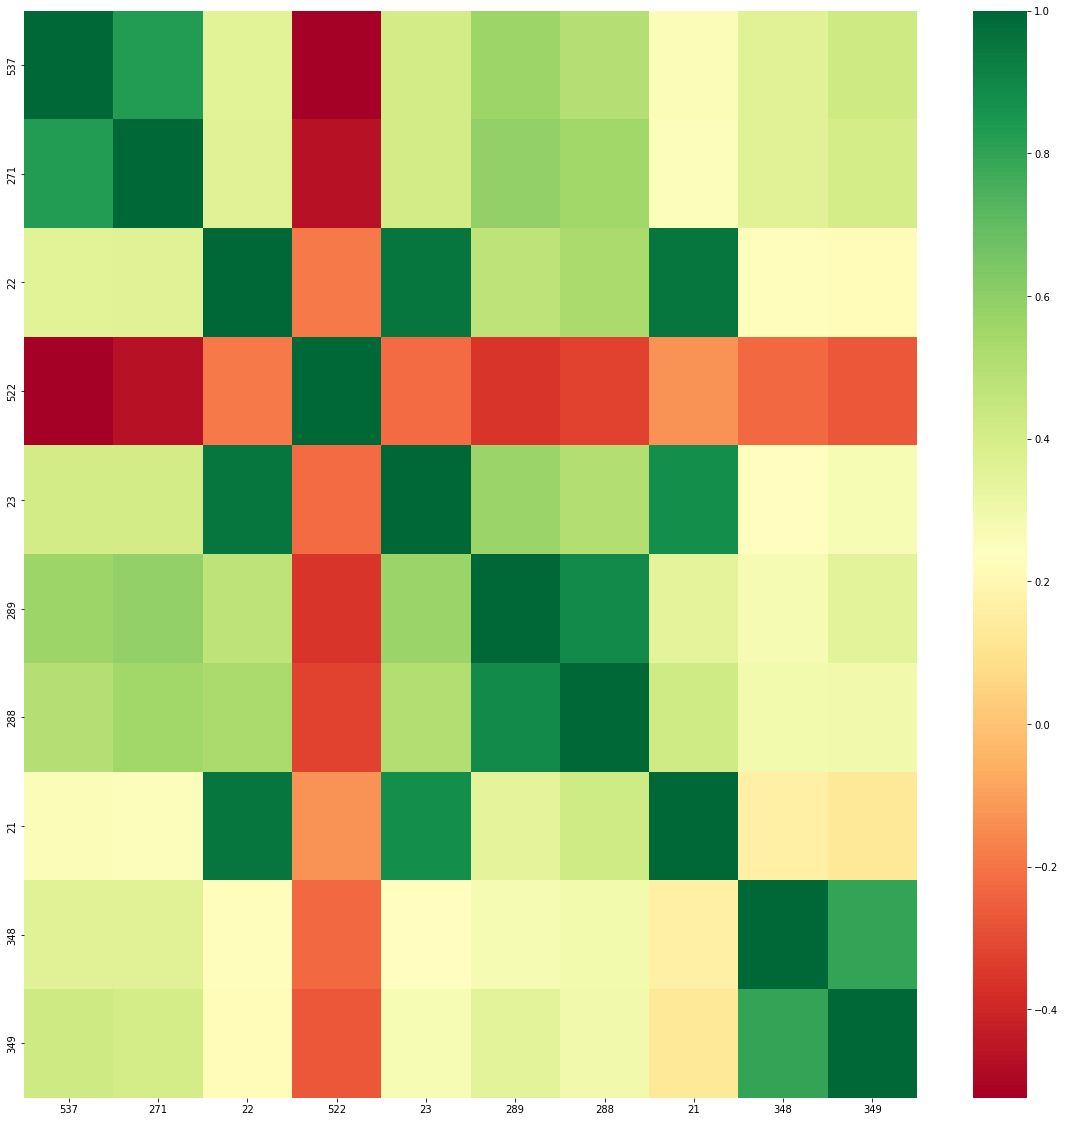

In [15]:
topk_features= list(feat_importances.nlargest(10).index)
# topk_features.append(len(df.columns)-1)
corrmat = df.iloc[:,topk_features].corr()
# print(corrmat)
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn")

In [16]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_down = pca.fit_transform(df.iloc[:,topk_features])


In [17]:
pca.explained_variance_ratio_

array([0.49265072, 0.18978474])

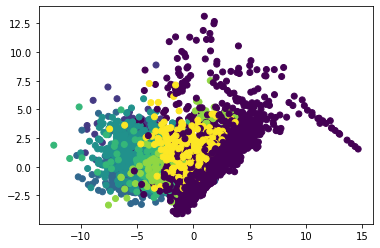

In [18]:
idx = np.arange(0,120000, 10)
plt.scatter(X_down[idx,0], X_down[idx,1], c=y[idx])

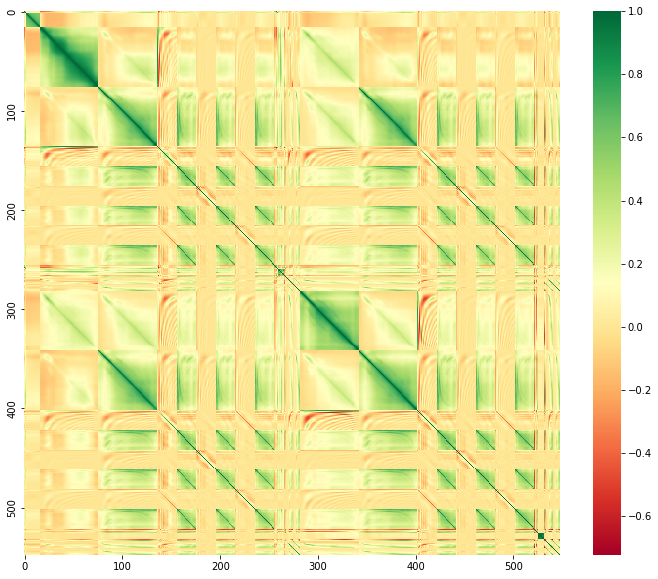

In [47]:
  # plotting correlation heatmap for all features
data_corr = df.iloc[:,:-1].corr()


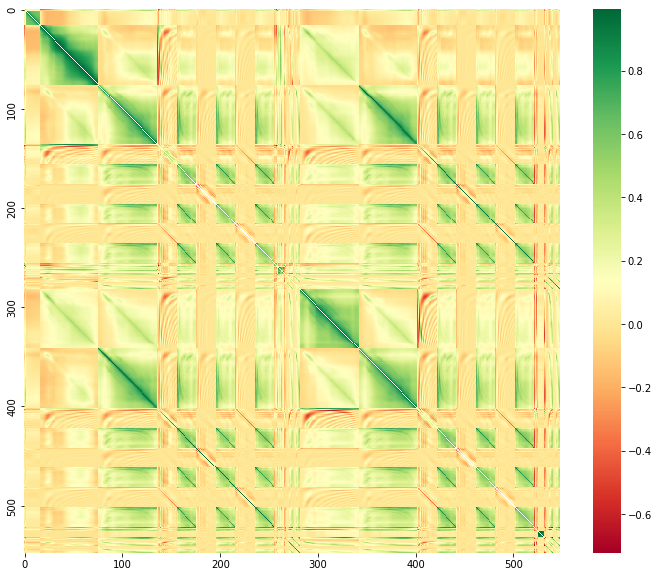

In [57]:
data_corr_no_diag = data_corr.copy()
for i in range(len(data_corr_no_diag)):
    data_corr_no_diag.iloc[i, i] = np.nan
fig, ax = plt.subplots(figsize=(12,10))
dataplot = sns.heatmap(data_corr_no_diag, ax=ax, xticklabels=100, yticklabels=100, cmap="RdYlGn")
  
# displaying heatmap
plt.show()

In [48]:
data_corr_np = data_corr.to_numpy()

In [49]:
data_corr_np.shape

(548, 548)

In [50]:
print(data_corr.shape)

(548, 548)


In [51]:
threshold = 0.8
abs_corr_matrix = data_corr.abs()
upper_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= threshold)]
print(len(to_drop))
print(to_drop)

388
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 87, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 214, 215, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 258, 261, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,

In [52]:
df_reduced = df.drop(df.columns[to_drop], axis=1)
df_reduced

,0,1,2,16,76,77,78,79,80,81,...,532,533,534,535,536,538,539,540,542,label
0,0.324853,2.234985,-0.461250,0.235287,-0.901281,0.363061,0.234093,0.908987,0.840539,1.300153,...,0.553743,-0.112544,3.660072,-0.879086,0.137068,0.139324,-0.172302,0.080310,0.530690,0.0
1,0.989178,0.132790,-0.469780,0.414635,-0.641577,-0.117441,0.414609,-0.182356,-0.572926,-0.407352,...,0.096336,-0.332673,1.178250,1.039736,-0.860921,-0.824272,0.151305,0.105084,1.853208,0.0
2,1.194685,0.010198,-0.453683,0.355121,0.256044,0.159733,-0.929693,-0.186252,-0.075692,-0.357577,...,0.022049,-0.452060,-0.834817,0.926383,0.351227,-0.138128,-0.407717,-0.003469,1.589867,0.0
3,1.469728,-0.275156,-0.452810,0.210839,0.096418,-0.491433,-0.046122,-0.658404,-0.604739,0.362549,...,0.297451,-0.537986,0.412554,1.038409,0.297438,-0.453944,-0.415646,-0.001220,0.587352,0.0
4,1.447376,0.114848,-0.471611,0.357751,0.251199,0.352752,-0.675133,1.615183,-0.051155,-0.777538,...,0.376575,-0.605842,0.132424,-0.150753,-0.225968,-0.936384,-0.574759,0.002824,0.057453,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,-0.307808,-0.400559,-0.594240,0.255726,0.208172,0.859027,-0.105199,0.777704,-0.730944,-0.422629,...,0.434905,-0.688802,0.906499,-0.602067,0.011942,-0.482227,-0.836325,-0.697713,-1.265575,0.0
119996,-0.441294,-0.619189,-0.598058,0.193310,-0.022139,0.042983,0.383651,-1.124548,-0.645856,-0.310830,...,0.735350,-0.492914,0.625478,0.410967,-0.234843,-0.205443,-0.535147,-0.703345,-0.006167,0.0
119997,-0.323950,-0.562923,-0.598347,0.272899,-0.483865,-0.580620,0.436100,0.633512,0.309726,-0.736440,...,0.620556,-0.557616,-0.039660,-0.856680,0.438788,-0.136509,-0.805287,-0.632309,1.107725,0.0
119998,-0.386658,-0.573564,-0.552378,0.349520,-0.108789,-1.301530,0.157032,0.305346,-0.257083,-0.299638,...,0.644440,-0.458048,0.581867,-0.035012,0.230688,-0.747289,-0.471637,-0.623406,-0.297675,0.0


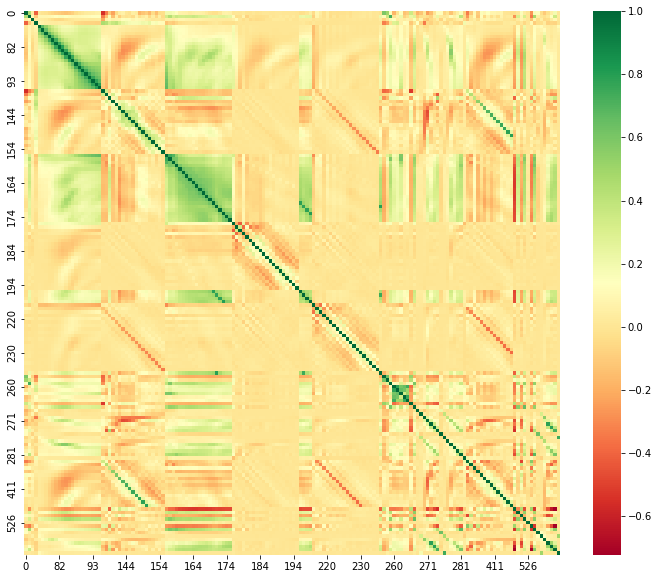

In [28]:
# df.corr()
  
# plotting correlation heatmap
data_corr_new = df_reduced.iloc[:,:-1].corr()
fig, ax = plt.subplots(figsize=(12,10))
dataplot = sns.heatmap(data_corr_new, ax=ax, xticklabels=10, yticklabels=10, cmap="RdYlGn")
  
# displaying heatmap
plt.show()

In [29]:
pca = PCA(n_components= 35)
X_down = pca.fit_transform(df_reduced.iloc[:,:-1])
print(X_down.shape)

(120000, 35)


In [30]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X_down)
print(X_embedded.shape)

(120000, 2)


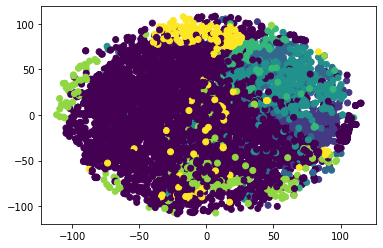

In [35]:
idx = np.arange(0,120000, 20)
plt.scatter(X_embedded[idx,0], X_embedded[idx,1], c=y[idx])

In [32]:
pca = PCA(n_components= 40)
X_down = pca.fit_transform(df.iloc[:,:-1])
print(X_down.shape)

(120000, 40)


In [33]:
from sklearn.manifold import TSNE
X_embedded_new = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X_down)
print(X_embedded_new.shape)

(120000, 2)


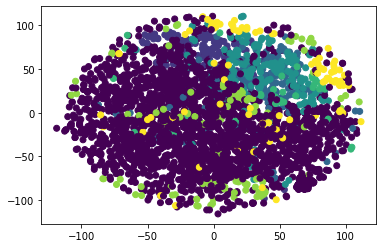

In [34]:
idx = np.arange(0,120000, 40)
plt.scatter(X_embedded_new[idx,0], X_embedded_new[idx,1], c=y[idx])